In [1]:
import pandas as pd
import numpy as np

from datetime import time


In [2]:
# Загрузка данных, преобразование в нужный формат и заполнение нулевых значений

ads = pd.read_csv('ads.csv', sep=',')
leads = pd.read_csv('leads.csv', sep=',')
purchases = pd.read_csv('purchases.csv', sep=',')
pd.set_option('display.max_rows',10000)

In [3]:
ads.head()
leads.head()
purchases.head()

,purchase_created_at,purchase_id,client_id,m_purchase_amount
0,2022-02-21,d3198d39-6d16-40c9-bff7-aa28bd6e2991,7011bdcd-6fd8-11e7-80fc-c412f533dba1,9950.0
1,2022-02-21,48a0ad24-77aa-4064-a971-dd0d6f1f6c50,a2771bb0-6fd6-11e7-80fc-c412f533dba1,8700.0
2,2022-02-21,267ff20f-a56c-480a-b2f7-1f7b1a746f9f,2687f503-6fd7-11e7-80fc-c412f533dba1,0.0
3,2022-02-21,19fba5f0-785d-45bd-903a-34ba529c6404,01122a97-45bc-11eb-ac23-c412f533dba1,8700.0
4,2022-02-21,00ac921d-32e3-4200-9435-a46d5fef4a29,a55b8c4e-d5a3-11e9-abbe-c412f533dba1,500.0


In [4]:
# Проверяем на пустые значения и верные типы данных

ads=ads.fillna('no info')
leads=leads.fillna('no info')
ads.info()
leads.info()
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       8602 non-null   object 
 1   d_ad_account_id  8602 non-null   object 
 2   d_utm_source     8602 non-null   object 
 3   d_utm_medium     8602 non-null   object 
 4   d_utm_campaign   8602 non-null   int64  
 5   d_utm_content    8602 non-null   int64  
 6   d_utm_term       8602 non-null   object 
 7   m_clicks         8602 non-null   float64
 8   m_cost           8602 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 605.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23540 entries, 0 to 23539
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_created_at      23540 non-null  object
 1   lead_id              23540 non-null  object
 2   d_lead_utm_sour

In [5]:
# приводим типы данных ads в соответствие

ads['d_utm_campaign'] = ads['d_utm_campaign'].astype(str)
ads['d_utm_content'] = ads['d_utm_content'].astype(str)
ads['m_clicks'] = ads['m_clicks'].astype(int)
ads['m_cost'] = ads['m_cost'].astype(int)
ads['created_at'] = pd.to_datetime(ads['created_at'], errors='coerce')
#ads

# приводим типы данных leads в соответствие
leads['lead_created_at'] = pd.to_datetime(leads['lead_created_at'], errors='coerce')
#leads.info()

# приводим типы данных purchases в соответствие
purchases['purchase_created_at'] = pd.to_datetime(purchases['purchase_created_at'], errors='coerce')
#purchases.info()

In [6]:
# Отчет по рекламе
adsReport = ads.groupby(['d_utm_source','d_utm_medium','d_utm_campaign']).agg({'m_clicks':'sum','m_cost':'sum'}).sort_values(by='m_clicks', ascending=False)
adsReportWithDate = ads.groupby(['created_at','d_utm_source','d_utm_medium','d_utm_campaign']).agg({'m_clicks':'sum','m_cost':'sum'}).sort_values(by='m_clicks', ascending=False)
adsReport.style.background_gradient(axis=None) 

# Отчет по лидам
adsLeads = ads.merge(leads, left_on = ['created_at', 'd_utm_source', 'd_utm_medium', 'd_utm_campaign', 'd_utm_content','d_utm_term'],
          right_on = ['lead_created_at', 'd_lead_utm_source', 'd_lead_utm_medium','d_lead_utm_campaign', 'd_lead_utm_content','d_lead_utm_term'],
          how = 'inner')

adsLeadsReport = adsLeads.groupby(['d_utm_source','d_utm_medium','d_utm_campaign']).agg({'lead_id':'count'}).sort_values(by='lead_id', ascending=False)
adsLeadsReportWithDate = adsLeads.groupby(['created_at','d_utm_source','d_utm_medium','d_utm_campaign']).agg({'lead_id':'count'}).sort_values(by='lead_id', ascending=False)
adsLeadsReport.style.background_gradient(axis=None) 

# Отчет по покупкам
adsLeadsPurchases = adsLeads.merge(purchases, on = ['client_id'], how = 'inner')

adsLeadsPurchasesReport = adsLeadsPurchases.groupby(['d_utm_source','d_utm_medium','d_utm_campaign']).agg({'client_id':'count','m_purchase_amount':'sum'}).sort_values(by='client_id', ascending=False)
adsLeadsPurchasesReportWithDate = adsLeadsPurchases.groupby(['created_at','d_utm_source','d_utm_medium','d_utm_campaign']).agg({'client_id':'count','m_purchase_amount':'sum'}).sort_values(by='client_id', ascending=False)
adsLeadsPurchasesReport.style.background_gradient(axis=None) 

# Определяем качественные лиды
adsLeadsPurchases_kach = adsLeadsPurchases[(adsLeadsPurchases['purchase_created_at'] - adsLeadsPurchases['lead_created_at'])/ np.timedelta64 ( 1 , 'D')<15] 
# Отчет по рекламе с лидами
adsLeadsPurchasesReport = adsLeadsPurchases_kach.groupby(['d_utm_source','d_utm_medium','d_utm_campaign']).agg({'purchase_id':'count','m_purchase_amount':'sum'}).sort_values(by='purchase_id', ascending=False)
adsLeadsPurchasesReportWithDate = adsLeadsPurchases_kach.groupby(['created_at','d_utm_source','d_utm_medium','d_utm_campaign']).agg({'purchase_id':'count','m_purchase_amount':'sum'}).sort_values(by='purchase_id', ascending=False)
adsLeadsPurchasesReport.style.background_gradient(axis=None) 

In [7]:
# соединяем все выборки воедино
ReportPart1 = adsReport.merge(adsLeadsReport, on = ['d_utm_source','d_utm_medium','d_utm_campaign'], how = 'left')
Report = ReportPart1.merge(adsLeadsPurchasesReport, on = ['d_utm_source','d_utm_medium','d_utm_campaign'], how = 'left')
Report
# отчет с группировкой по датам
ReportPart1WithDate = adsReportWithDate.merge(adsLeadsReportWithDate, on = ['created_at','d_utm_source','d_utm_medium','d_utm_campaign'], how = 'left')
ReportWithDate = ReportPart1WithDate.merge(adsLeadsPurchasesReportWithDate, on = ['created_at','d_utm_source','d_utm_medium','d_utm_campaign'], how = 'left')
ReportWithDate

,,,,m_clicks,m_cost,lead_id,purchase_id,m_purchase_amount
created_at,d_utm_source,d_utm_medium,d_utm_campaign,,,,,
2022-08-29,yandex,cpc,48306450,67,1970,9.0,8.0,74120.0
2022-08-25,yandex,cpc,48306450,65,2019,7.0,3.0,20595.0
2022-08-01,yandex,cpc,48306450,63,1494,5.0,4.0,13895.0
2022-08-24,yandex,cpc,48306450,63,1781,5.0,1.0,10390.0
2022-09-06,yandex,cpc,48306450,60,1849,9.0,8.0,58469.0
2022-09-12,yandex,cpc,48306450,60,1808,6.0,4.0,17509.0
2022-08-30,yandex,cpc,48306450,59,1867,7.0,3.0,12925.0
2022-09-05,yandex,cpc,48306450,59,1811,4.0,1.0,9995.0
2022-09-07,yandex,cpc,48306450,59,1882,1.0,NaN,NaN


In [8]:
# Вычисляем показатели 
Report['CPL'] = Report.m_cost / Report.lead_id
Report['ROAS'] = Report.m_purchase_amount / Report.m_cost*100
Report=Report.fillna(0)
Report.style.background_gradient(axis=None)


ReportWithDate['CPL'] = ReportWithDate.m_cost / ReportWithDate.lead_id
ReportWithDate['ROAS'] = ReportWithDate.m_purchase_amount / ReportWithDate.m_cost*100
ReportWithDate=ReportWithDate.sort_values(by='created_at', ascending=False).fillna(0)


In [9]:
# Экспорт итоговой таблицы
ReportWithDate.to_csv('AdsLeadsPurchases.csv', encoding='utf8') 
Report_plot= Report.reset_index()

<Axes: xlabel='d_utm_campaign'>

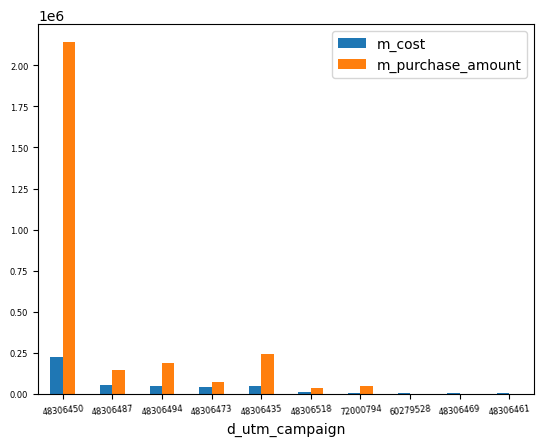

In [10]:
# сравнение доходов и расходов
Report_plot.plot(x='d_utm_campaign', y=["m_cost","m_purchase_amount"], kind="bar",rot=5, fontsize=6)

In [11]:
Report_plot.info()
Report_plot.rename(columns = {'d_utm_source':'source', 'd_utm_medium':'medium',
                              'd_utm_campaign':'campaign', 'm_clicks':'clicks',
                              'm_cost':'cost', 'lead_id':'leads',
                              'purchase_id':'perchases', 'm_purchase_amount':'amount'}, inplace = True )
Report_plot['CPL'] = Report_plot['CPL'].astype(int)
Report_plot['ROAS'] = Report_plot['ROAS'].astype(int)
Report_plot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   d_utm_source       10 non-null     object 
 1   d_utm_medium       10 non-null     object 
 2   d_utm_campaign     10 non-null     object 
 3   m_clicks           10 non-null     int32  
 4   m_cost             10 non-null     int32  
 5   lead_id            10 non-null     int64  
 6   purchase_id        10 non-null     float64
 7   m_purchase_amount  10 non-null     float64
 8   CPL                10 non-null     float64
 9   ROAS               10 non-null     float64
dtypes: float64(4), int32(2), int64(1), object(3)
memory usage: 852.0+ bytes


,source,medium,campaign,clicks,cost,leads,perchases,amount,CPL,ROAS
0,yandex,cpc,48306450,8352,224365,849,485.0,2141667.0,264,954
1,yandex,cpc,48306487,2592,55677,205,42.0,143944.0,271,258
2,yandex,cpc,48306494,2472,49545,172,67.0,190303.0,288,384
3,yandex,cpc,48306473,2214,39798,123,18.0,71236.0,323,178
4,yandex,cpc,48306435,2075,49599,143,70.0,245139.0,346,494
5,yandex,cpc,48306518,689,13030,65,24.0,37421.0,200,287
6,yandex,cpc,72000794,230,5032,19,10.0,48990.0,264,973
7,yandex,cpc,60279528,67,4299,1,0.0,0.0,4299,0
8,yandex,cpc,48306469,55,3812,3,0.0,0.0,1270,0
9,yandex,cpc,48306461,51,3898,1,1.0,290.0,3898,7


In [13]:
# Представление данных в отчете

import dash
from dash import dcc
from dash import html
import plotly.express as px

data = Report_plot
#Создание маблицу для представления в отчете
def generate_table(dataframe, max_rows=10):
    return html.Table(
        # Header
        [html.Tr([html.Th(col) for col in dataframe.columns])] +

        # Body
        [html.Tr([
            html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
        ]) for i in range(min(len(dataframe), max_rows))]
    )

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']


# Создаем дашборд
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

#fig = px.scatter(itogo2_plot, x="ID_chanel", y="m_cost") 

app.layout = html.Div(children=[
   html.H1(children='Сквозная аналитика'),  

   html.Div(children='''
       Давно не писала, но есть огромный потенциал все это вспомнить и изучить новое).
   '''),  
    generate_table(data),
   dcc.Graph(
       id='example-graph',
       figure={
           'data': [
               {"x": data["campaign"], "y": data["cost"], 'type': 'bar', 'name': 'Расход'},
               {"x": data["campaign"], "y": data["amount"], 'type': 'bar', 'name': 'Доход'}
           ],
           'layout': {
               'title': 'График дохода и расхода'
           }
       }
   )
    
])

import socket
from contextlib import closing

def find_free_port():
    with closing(socket.socket(socket.AF_INET, socket.SOCK_STREAM)) as s:
        s.bind(('',0)) # '' means localhost and 0 means to find a free port
        s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
        return s.getsockname()[1]

if __name__ == '__main__':
    port = find_free_port()
    app.run_server(debug=True, port=port)